## 1. Introduction to Logistic Regression 

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os 
import warnings

warnings.filterwarnings('ignore')

# Import dataset

In [76]:
df = pd.read_csv('../data/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


# Exploratory data analysis

In [77]:
df.shape

(259908, 24)

In [78]:
df.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RISK_MM           True
RainTomorrow      True
dtype: bool

In [79]:
col_names = df.columns 
col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')


# Drop RISK_MM variable

It is given in the dataset description, that we should drop the RISK_MM feature variable from the dataset description. So, we should drop it as follows

In [80]:
df.drop(['RISK_MM'], axis=1, inplace=True)


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259908 entries, 0 to 259907
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           259908 non-null  object 
 1   Location       259908 non-null  object 
 2   MinTemp        255308 non-null  float64
 3   MaxTemp        255373 non-null  float64
 4   Rainfall       251949 non-null  float64
 5   Evaporation    111743 non-null  float64
 6   Sunshine       101224 non-null  float64
 7   WindGustDir    240668 non-null  object 
 8   WindGustSpeed  240862 non-null  float64
 9   WindDir9am     239650 non-null  object 
 10  WindDir3pm     248385 non-null  object 
 11  WindSpeed9am   254453 non-null  float64
 12  WindSpeed3pm   250031 non-null  float64
 13  Humidity9am    253840 non-null  float64
 14  Humidity3pm    248930 non-null  float64
 15  Pressure9am    231248 non-null  float64
 16  Pressure3pm    231270 non-null  float64
 17  Cloud9am       142142 non-nul

Types of variables 

In [82]:
categorical = [var for var  in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [83]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [84]:
cat1 = [var for var in categorical if df[var].isnull().sum() != 0]

df[cat1].isnull().sum()

WindGustDir     19240
WindDir9am      20258
WindDir3pm      11523
RainToday        7959
RainTomorrow     7959
dtype: int64

Frequency counts of categorical variables

In [85]:
for var in categorical:
    print(df[var].value_counts())

Date
2020-07-03    49
2020-06-18    49
2020-06-19    49
2020-06-20    49
2020-06-21    49
              ..
2008-01-11     1
2008-01-12     1
2008-01-13     1
2008-01-14     1
2008-01-31     1
Name: count, Length: 5841, dtype: int64
Location
Canberra            5841
Sydney              5749
Hobart              5598
Brisbane            5598
Melbourne           5598
Darwin              5598
Perth               5597
Wollongong          5445
Albury              5445
GoldCoast           5445
Townsville          5445
Cairns              5445
AliceSprings        5445
Launceston          5445
MountGambier        5444
Tuggeranong         5444
Penrith             5444
Albany              5444
Ballarat            5443
Bendigo             5436
MountGinini         5433
Sale                5414
MelbourneAirport    5414
Watsonia            5414
WaggaWagga          5414
CoffsHarbour        5414
Moree               5414
Cobar               5414
Williamtown         5414
NorfolkIsland       5414
Richmond 

In [86]:
for var in categorical:
    print(df[var].value_counts()/np.float64(len(df)))

Date
2020-07-03    0.000189
2020-06-18    0.000189
2020-06-19    0.000189
2020-06-20    0.000189
2020-06-21    0.000189
                ...   
2008-01-11    0.000004
2008-01-12    0.000004
2008-01-13    0.000004
2008-01-14    0.000004
2008-01-31    0.000004
Name: count, Length: 5841, dtype: float64
Location
Canberra            0.022473
Sydney              0.022119
Hobart              0.021538
Brisbane            0.021538
Melbourne           0.021538
Darwin              0.021538
Perth               0.021535
Wollongong          0.020950
Albury              0.020950
GoldCoast           0.020950
Townsville          0.020950
Cairns              0.020950
AliceSprings        0.020950
Launceston          0.020950
MountGambier        0.020946
Tuggeranong         0.020946
Penrith             0.020946
Albany              0.020946
Ballarat            0.020942
Bendigo             0.020915
MountGinini         0.020904
Sale                0.020830
MelbourneAirport    0.020830
Watsonia            0.02

In [87]:
df['Date'].dtype

dtype('O')



We can see that the data type of Date variable is object. I will parse the date currently coded as object into datetime format.


In [88]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dtype

dtype('<M8[ns]')

In [89]:
df['Year'] = df['Date'].dt.year
df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int32

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259908 entries, 0 to 259907
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           259908 non-null  datetime64[ns]
 1   Location       259908 non-null  object        
 2   MinTemp        255308 non-null  float64       
 3   MaxTemp        255373 non-null  float64       
 4   Rainfall       251949 non-null  float64       
 5   Evaporation    111743 non-null  float64       
 6   Sunshine       101224 non-null  float64       
 7   WindGustDir    240668 non-null  object        
 8   WindGustSpeed  240862 non-null  float64       
 9   WindDir9am     239650 non-null  object        
 10  WindDir3pm     248385 non-null  object        
 11  WindSpeed9am   254453 non-null  float64       
 12  WindSpeed3pm   250031 non-null  float64       
 13  Humidity9am    253840 non-null  float64       
 14  Humidity3pm    248930 non-null  float64       
 15  

In [91]:
df.drop('Date', axis=1, inplace = True)

In [92]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008


# Outliers in numerical variables

In [93]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 17 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year']


In [94]:
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008


In [96]:
df[numerical].isnull().sum()

MinTemp            4600
MaxTemp            4535
Rainfall           7959
Evaporation      148165
Sunshine         158684
WindGustSpeed     19046
WindSpeed9am       5455
WindSpeed3pm       9877
Humidity9am        6068
Humidity3pm       10978
Pressure9am       28660
Pressure3pm       28638
Cloud9am         117766
Cloud3pm         123804
Temp9am            4592
Temp3pm            9614
Year                  0
dtype: int64

In [97]:
print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  255308.0  255373.0  251949.0     111743.0  101224.0       240862.0   
mean       12.0      23.0       2.0          6.0       8.0           40.0   
std         6.0       7.0       9.0          4.0       4.0           13.0   
min        -9.0      -4.0       0.0          0.0       0.0            2.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      49.0     474.0        139.0      14.0          154.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      254453.0      250031.0     253840.0     248930.0     231248.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

On closer inspection, we can see that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns may contain outliers.



I will draw boxplots to visualise outliers in the above variables.

Text(0, 0.5, 'WindSpeed3pm')

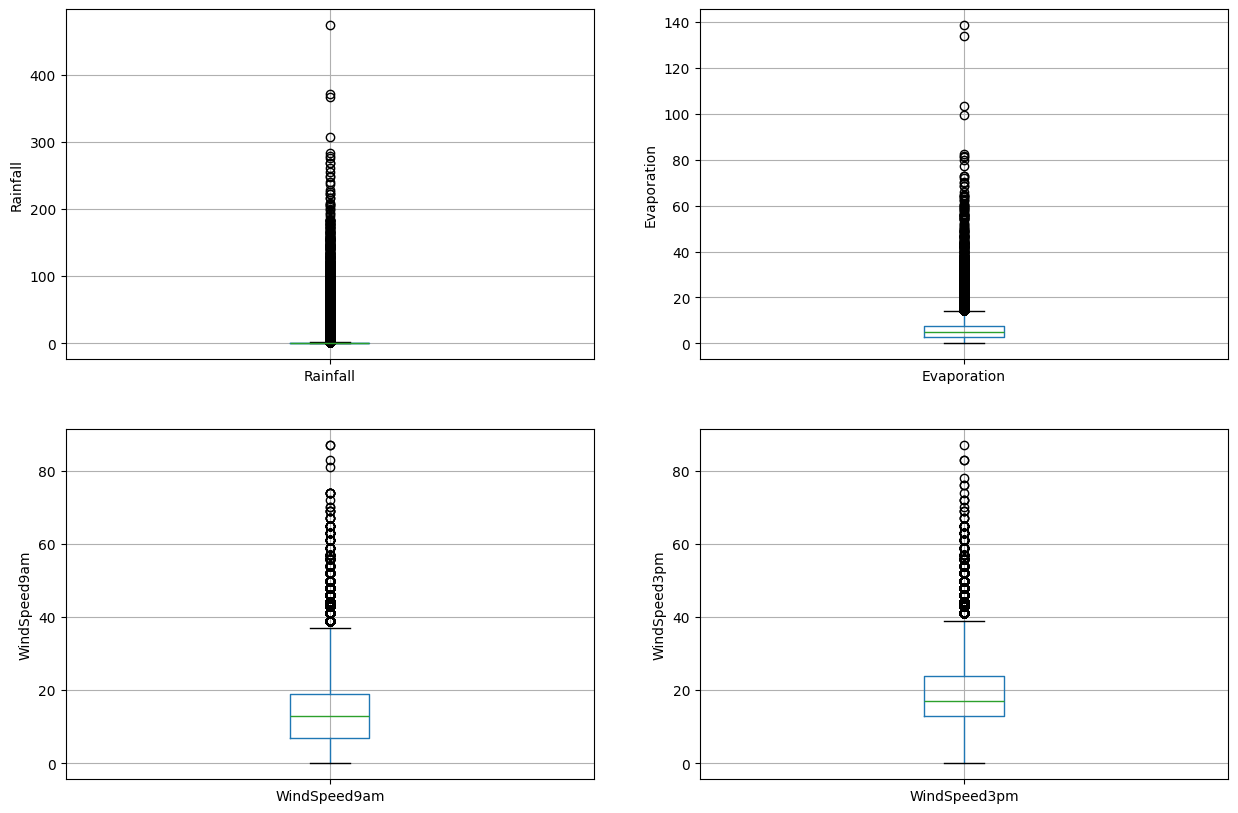

In [98]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')